#### single-label, multiclass classification problem

In [1]:
# imorting necessary libraries
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Loading the MNIST dataset in Keras and split data into train and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape) # 60,000 samples with 28X28 pixels
print(test_images.shape) # 10,000 samples with 28X28 pixels

# Preparing the image data as per network requirement
train_images_reshaped = train_images.reshape((60000, 28*28))
train_images_reshaped = train_images_reshaped.astype('float32')/255
test_images_reshaped = test_images.reshape((10000,28*28))
test_images_reshaped = test_images_reshaped.astype('float32')/255

print(train_images_reshaped.shape)
print(test_images_reshaped.shape)

# Preparing the labels as per network requirement
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

# splitting train data into 
valid_images_reshaped = train_images_reshaped[:10000]
partial_train_images_reshaped = train_images_reshaped[10000:]

valid_labels_encoded = train_labels_encoded[:10000]
partial_train_labels_encoded = train_labels_encoded[10000:]

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [3]:
#  network architecture
# Sequential class used only for linear stacks of layers
# functional API used for directed acyclic graphs of layers
model = models.Sequential()
# fully connected layer with 512 filters
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
# fully connected layer with 10 output classes
model.add(layers.Dense(10,activation='softmax'))

# compilation step
# binary crossentropy for a two-class classification problem
# categorical crossentropy for a many-class classification problem
# meansquared error for a regression problem
# connectionist temporal classification for a sequence-learning problem
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

# training step
history = model.fit(partial_train_images_reshaped,partial_train_labels_encoded,epochs=20,batch_size=128,
          validation_data=(valid_images_reshaped, valid_labels_encoded))

# evaluation step
test_loss,test_acc = model.evaluate(test_images_reshaped,test_labels_encoded)
print('test_acc:',test_acc)

Epoch 1/20
391/391 [==============================] - 5s 9ms/step - loss: 0.2916 - accuracy: 0.9167 - val_loss: 0.1657 - val_accuracy: 0.9517
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 0.1184 - accuracy: 0.9654 - val_loss: 0.1191 - val_accuracy: 0.9670
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.0776 - accuracy: 0.9766 - val_loss: 0.0888 - val_accuracy: 0.9731
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0562 - accuracy: 0.9832 - val_loss: 0.0822 - val_accuracy: 0.9764
Epoch 5/20
391/391 [==============================] - 3s 6ms/step - loss: 0.0415 - accuracy: 0.9874 - val_loss: 0.0719 - val_accuracy: 0.9796
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0737 - val_accuracy: 0.9779
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0872 - val_accuracy: 0.9744
Epoch 

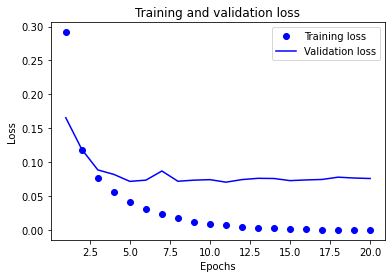

In [4]:
history_dict = history.history
acc = history_dict.get('accuracy')
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

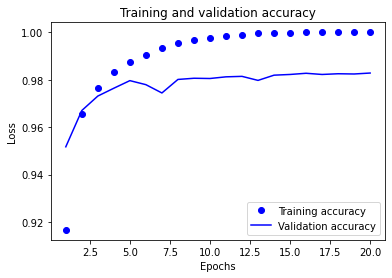

In [5]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
y_predicted = model.predict(test_images_reshaped)

313/313 [==============================] - 1s 2ms/step


In [7]:
y_predicted[0]

array([2.8111239e-11, 2.5215553e-13, 2.5879870e-10, 3.0214005e-07,
       5.5675959e-17, 4.0209584e-13, 2.3782603e-18, 9.9999964e-01,
       7.4306724e-12, 3.1756935e-09], dtype=float32)